# Replication of Fig. 1, Fig. 2 and eq. 2 from "Macroscopic description for networks of spiking neurons" by Ernest Montbrió Diego Pazó and Alex Roxin

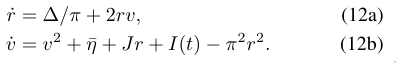

*The system of equations for the firing rate and mean membrane potential*

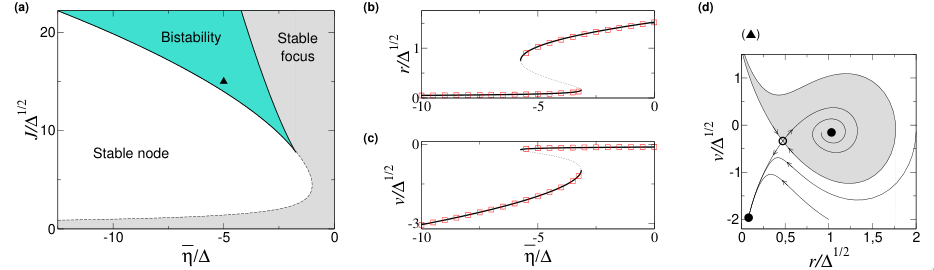

*a: Parameter space (phase diagram), b and c: bifurcation diagrams for J=15 and d: phase portrait of the system*

## Paraphrasing the manusript, eq. 2 describes a system of two ordinary differential equations for the firing rate and mean membrane potential of neuronal networks of heterogeneous, all-to-all coupled quadratic integrate-and-fire (QIF) neurons, which are the canonical model of a Hodkin-Huxley neuron of class 1 excitability, in which a resting state disappears through a saddle-node bifurcation.
## In this notebook I'll be exploring parameter space of eq. 2 by having studied its fixed points and therefore the parameter values for which this dynamical system is near bifurcation points: spiral-node and saddle-node transitions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from ipywidgets import interact

Standard runge-kutta 4 method for numerical integration

In [3]:
def rk4(drdt, r, t, dt, *args, **kwargs):
    r = np.asarray(r)
    k1 = np.asarray(drdt(r, t, *args, **kwargs))*dt
    k2 = np.asarray(drdt(r + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(drdt(r + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(drdt(r + k3, t, *args, **kwargs))*dt
    return r + (k1 + 2*k2 + 2*k3 + k4)/6

Define the vector fields (r,v) from eq. 12 for two cases: the one in which I(t) = 3 is injected when t>0, and the sinusoidal current case.

In [4]:
def sin(t):
    if t<0:
        sin = 0
    else:
        sin = 3*np.sin(t*(np.pi/20))
    return sin
    
def step(t):
    if 0<t<30:
        step = 3
    else:
        step = 0
    return step
    
def campostep(z, t):
    
    r = z[0]
    v = z[1]
    drdt = 1/np.pi + 2*r*v
    dvdt = v**2 - 5 + 15*r -(np.pi*r)**2 + step(t)
    return [drdt, dvdt]
    
def camposin(z, t):
    
    r = z[0]
    v = z[1]
    
    drdt = 1/np.pi + 2*r*v
    dvdt = v**2 - 5 + 15*r -(np.pi*r)**2 + sin(t)
    return [drdt, dvdt]

Numerical integration of the vector fields for the constant and periodic current injection cases, and plotting each solution (membrane potential and firing rate) separately.

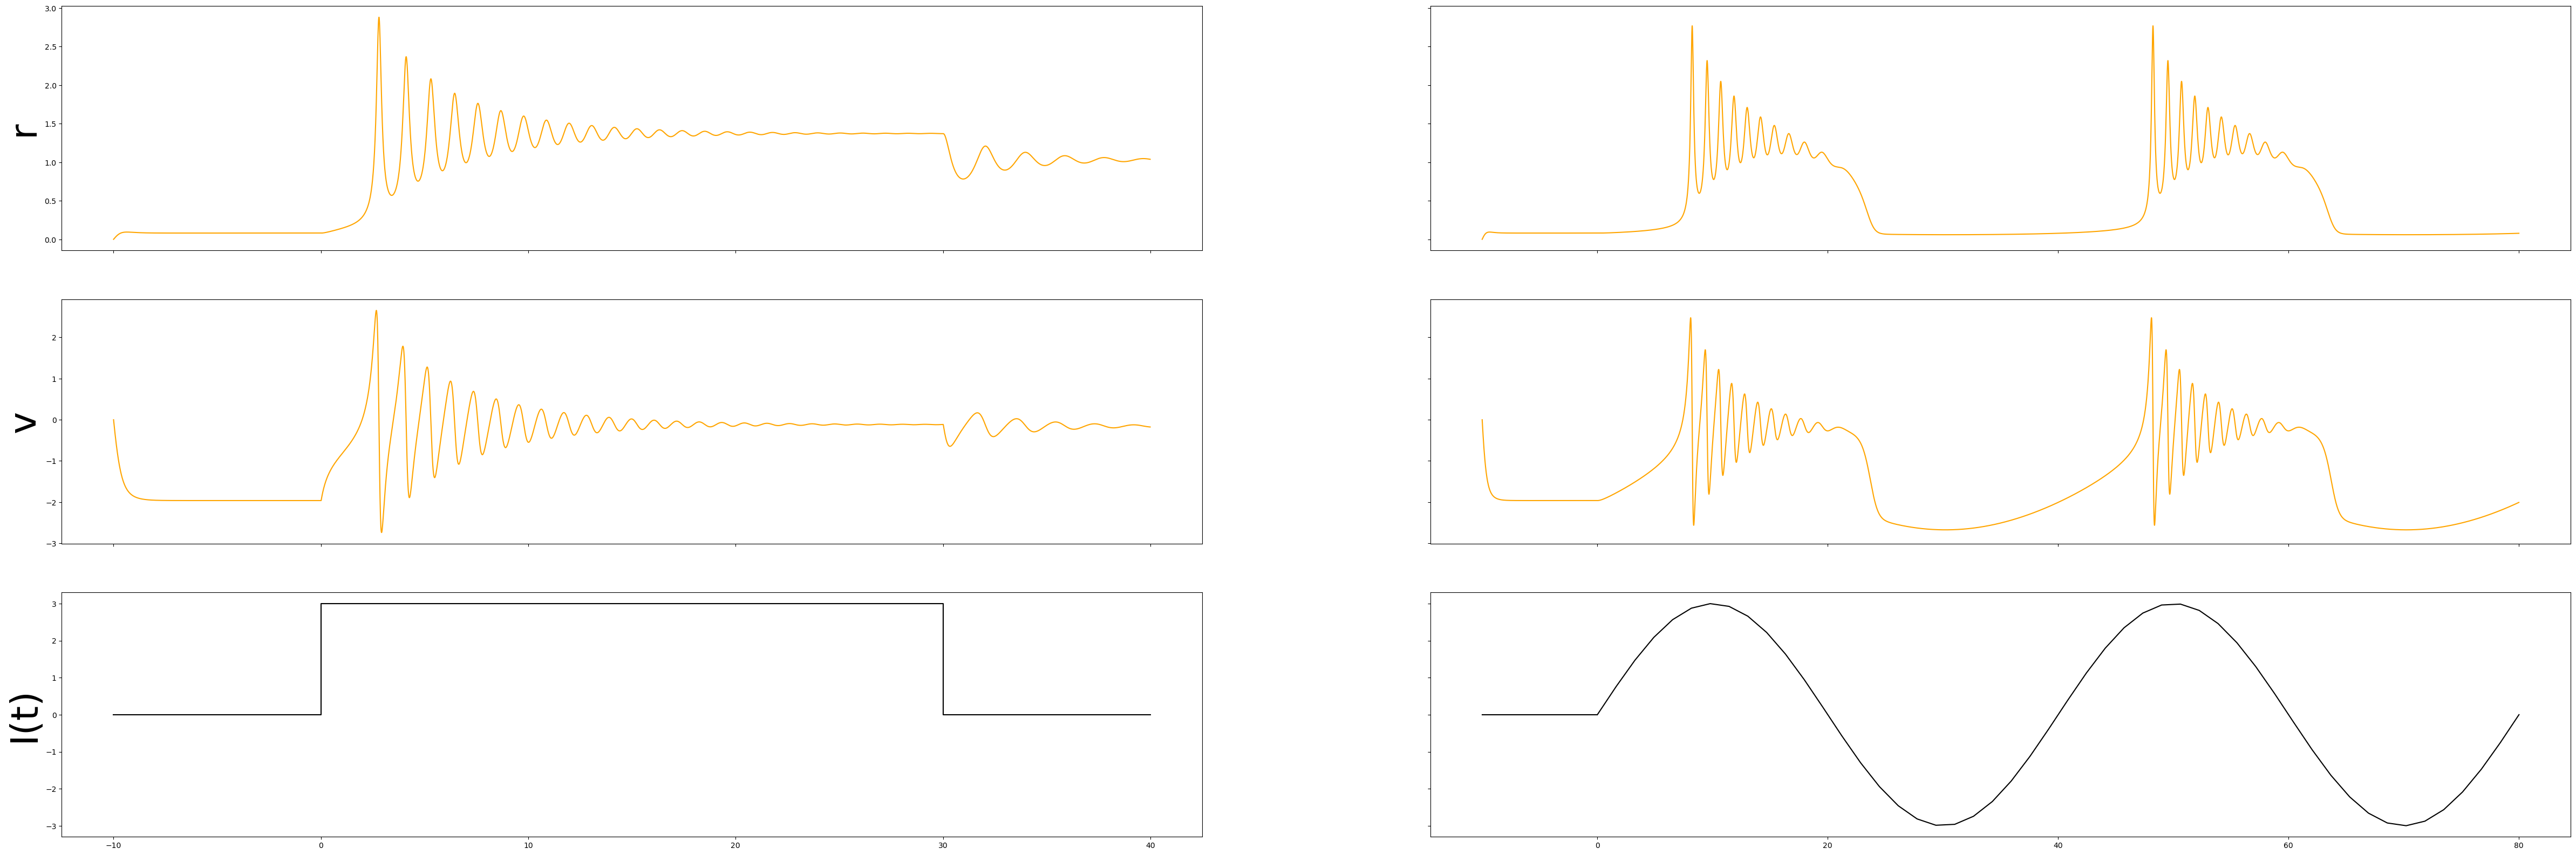

In [5]:
# constant current case
dt = 0.01
t = np.arange(-10, 40, step=dt)
rrk = np.zeros_like(t)
vrk = np.zeros_like(t)

for ir, tt in enumerate(t[:-1]):
    rrk[ir+1], vrk[ir+1] = rk4(campostep, [rrk[ir], vrk[ir]], tt, dt)

# periodic case
dt = 0.01
t2 = np.arange(-10, 80, step=dt)
rrksin = np.zeros_like(t2)
vrksin = np.zeros_like(t2)

for ir, tt in enumerate(t2[:-1]):
    rrksin[ir+1], vrksin[ir+1] = rk4(camposin, [rrksin[ir], vrksin[ir]], tt, dt)


f, ax = plt.subplots(3, 2, sharex='col',sharey = 'row',figsize=(60,20))


ax[0,0].plot(t,rrk,color='orange')
ax[0,0].set_ylabel('r',fontsize=50)


ax[1,0].plot(t,vrk,color='orange')
ax[1,0].set_ylabel('v',fontsize=50)

ejex = [-10,0,30,40]
ejey = [0,0,3,0]

ax[2,0].step(ejex,ejey,color='black')
ax[2,0].set_ylabel('I(t)',fontsize=50)


ejex2 = [-10,0]
ejey2 = [0,0]
tpositivo = np.linspace(0,80)

ax[0,1].plot(t2,rrksin,color='orange')
ax[1,1].plot(t2,vrksin,color='orange')
ax[2,1].step(ejex2,ejey2,color='black')
ax[2,1].plot(tpositivo,3*np.sin(tpositivo*(np.pi/20)),color='black')


plt.show()

Create a meshgrid in which to evaluate the vector field

In [6]:
XX, YY = np.meshgrid(np.arange(0,3,0.1), np.arange(-3,3, .01))

Evaluate the vector fields for the time-step and the periodic cases.
DXDY_overtime_sin contains the derivatives of XX and YY for each time point tt. So it yields, for each time tt, the vector field, which I later place on the right place of parameter space with the meshgrid.

In [7]:
DXDY_overtime_sin = [camposin([XX, YY], tt) for tt in t2]
DXDY_overtime = [campostep([XX, YY], tt) for tt in t] 

Get the X and Y derivatives separately for fig. 1d

In [8]:
DX, DY = camposin([XX, YY],0)

Write the curves of parameter space for fig. 1a obtained analytically

In [9]:
n = lambda r: -np.pi**2*r**2 - 3/(2*np.pi*r)**2
j = lambda r: 2*np.pi**2*r + 1/(2*np.pi**2*r**3)
r = np.linspace(-10,10,1000)
curvax = lambda y: -(y/(2*np.pi))**2 - (np.pi/y)**2

create the periodic function for the values the n parameter will take

In [10]:
def bolita(t):
    #for tt in enumerate(t[:]):
        if t<0:
            return -5 # the ball's starting point on the n parameter.
        else:
            return 3*np.sin(t*(np.pi/20))-5 # the periodic I(t) injected into the system


Create a vector with the results of bolita(t) outside the animation, the same way that i did for the time series with rk4.

In [11]:
t2 = np.arange(-10, 80, step=dt)
valores_bolita = np.zeros_like(t2)
for i in range(len(t2)):
    valores_bolita[i] = bolita(t2[i])
print(valores_bolita)

[-5.         -5.         -5.         ... -5.01413711 -5.00942476 -5.00471239]


Animate the vector field on the parameter values surrounding the bistable region between low and high firing rates, fixing J on 15 in order to neglect the spiral-node bifurcation and focus solely on the saddle-node transition.
For that, I'll first generate the background for the animation.

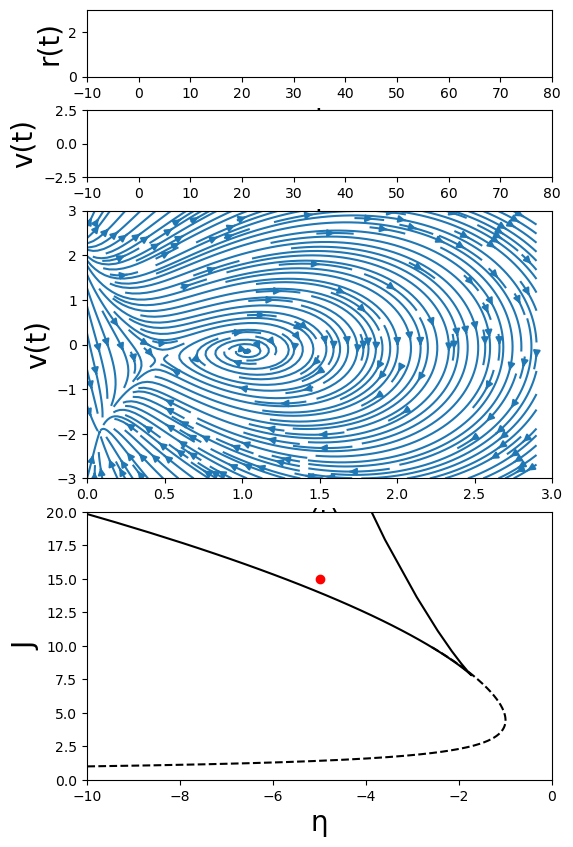

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML

#fig, ax = plt.subplots()
fig, ax = plt.subplots(4, 1,sharey = 'row',figsize=(12,16), gridspec_kw={'height_ratios': [1,1,4,4]})


ax[0].set_xlim(( -10, 80))
ax[0].set_ylim((0, 3))
ax[0].set_ylabel('r(t)',fontsize=20)
ax[0].set_xlabel('t',fontsize=20)

ax[1].set_xlim(( -10, 80))
ax[1].set_ylim((-2.5, 2.5))
ax[1].set_ylabel('v(t)',fontsize=20)
ax[1].set_xlabel('t',fontsize=20)

line1, = ax[0].plot([], [], lw=2)
line2, = ax[1].plot([], [], lw=2)
line1.set_color("orange")
line2.set_color("orange")

ax[2].set_xlim((0,3))
ax[2].set_ylim((-3,3))
ax[2].set_xlabel('r(t)',fontsize=20)
ax[2].set_ylabel('v(t)',fontsize=20)

stream = ax[2].streamplot(XX, YY, DX, DY, density=2, minlength=.05)


ax[3].axis([-10,0,0,20]);

ax[3].set_xlabel('ƞ',fontsize=20)
ax[3].set_ylabel('J',fontsize=20)

ax[3].set_xlim((-10,0))
point1, = ax[3].plot([-5], [15], 'ro');

curva1 = ax[3].plot(n(r),j(r),color='black',label = 'ƞ(r),J(r)');
curvaxplot = ax[3].plot(curvax(r),r,'--',color='black');

J = 15

In [ ]:
plt.rcParams['animation.embed_limit'] = 2**128
jump = 10
J = 15
yr=J
# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    return (line1,)

# animation function. This is called sequentially
def animate(i):
    tsin = t2[:(jump*i-1)]
    r2 = rrksin[:(jump*i-1)]
    v2 = vrksin[:(jump*i-1)]
    line1.set_data(tsin, r2)
    line2.set_data(tsin, v2)
    
    for element in ax[2].collections[:]:
        if True:  # Whatever condition is needed.
            element.remove()
    for element in ax[2].collections[:]:
        if True:  # Whatever condition is needed.
            element.remove()
    #ax[2].collections = [] 
    #ax[2].patches = [] 
    DX, DY = DXDY_overtime_sin[jump*i-1]
    ax[2].streamplot(XX, YY, DX, DY, density=2, minlength=.05, color="black")
    
    x = valores_bolita[(jump*i-1)]
    y = yr
    point1.set_data([x], [y]);
    return line1, line2, point1



# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100)

HTML(anim.to_html5_video())

In [15]:
# x2 speed is better
from IPython.display import Video

Video("montbrio_video_simulation.mp4")

Backwards integration from t=-5s (the parameter values of the start of the video, on the bistable region).

What I'm asking from the red, green and blue backwards integration is to integrate phase space as if the system had always been on this state when, in fact, I was changing n sinusoidally. Therefore, I'll create the campoconstante function with an extra parameter accounting for the time in which I want to have the phase portrait. Each curve will have slightly different initial conditions; since we are on the bistable region of parameter space, we get three qualitatively different solutions by slightly changing the initial conditions.

Text(0, 0.5, 'v(t)')

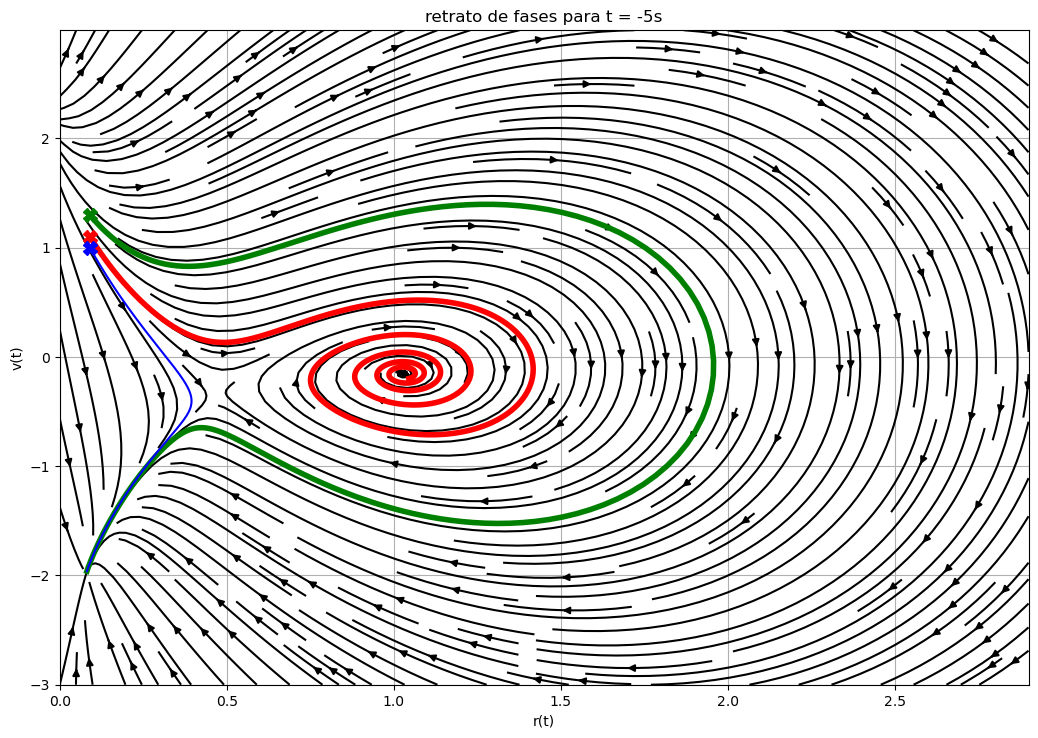

In [7]:
def campoconstante(z, t,tiempo):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    r = z[0]
    v = z[1]
    # y ahora calculamos las derivadas
    drdt = 1/np.pi + 2*r*v
    dvdt = v**2 - 5 + 15*r -(np.pi*r)**2 + sin(tiempo)
    return [drdt, dvdt]

XX, YY = np.meshgrid(np.arange(0,3,0.1), np.arange(-3,3, .01))
DX, DY = camposin([XX, YY],-5)
plt.streamplot(XX, YY, DX, DY, density=2, minlength=.05,color='black')
plt.rcParams['figure.figsize'] = [12.5, 8.5]
plt.grid()
plt.title('retrato de fases para t = -5s')

# integro para atras y adelante desde el saddle
dt = 0.01
t = np.arange(0,10, step=dt)
# se ve que en (0,-2) hay algo
xrk1 = np.zeros_like(t)
yrk1 = np.zeros_like(t)
xrk1[0] = 0.09
yrk1[0] = 1.3
for ix, tt in enumerate(t[:-1]):
    xrk1[ix+1], yrk1[ix+1] = rk4(campoconstante, [xrk1[ix], yrk1[ix]], tt, dt,-5) #aca puse tiempo= -5
plt.plot(xrk1, yrk1,color='green',linewidth=4)
plt.plot(xrk1[0], yrk1[0], 'gX',markersize=10)
##############################
xrk2 = np.zeros_like(t)
yrk2 = np.zeros_like(t)
xrk2[0] = 0.09
yrk2[0] = 1.1
for ix, tt in enumerate(t[:-1]):
    xrk2[ix+1], yrk2[ix+1] = rk4(campoconstante, [xrk2[ix], yrk2[ix]], tt, dt,-5) #aca puse tiempo= -5
plt.plot(xrk2, yrk2,color='red',linewidth=4)
plt.plot(xrk2[0], yrk2[0], 'rX',markersize=10)
####################################
xrk3 = np.zeros_like(t)
yrk3 = np.zeros_like(t)
xrk3[0] = 0.09
yrk3[0] = 1
for ix, tt in enumerate(t[:-1]):
    xrk3[ix+1], yrk3[ix+1] = rk4(campoconstante, [xrk3[ix], yrk3[ix]], tt, dt,-5) #aca puse tiempo= -5
plt.plot(xrk3, yrk3,color='blue')
plt.plot(xrk3[0], yrk3[0], 'bX',markersize=10)

plt.xlabel('r(t)')
plt.ylabel('v(t)')

Next, we'll have the same code as before, only changing the time (from -5 to 10). We now have only a spiral.

Text(0, 0.5, 'v(t)')

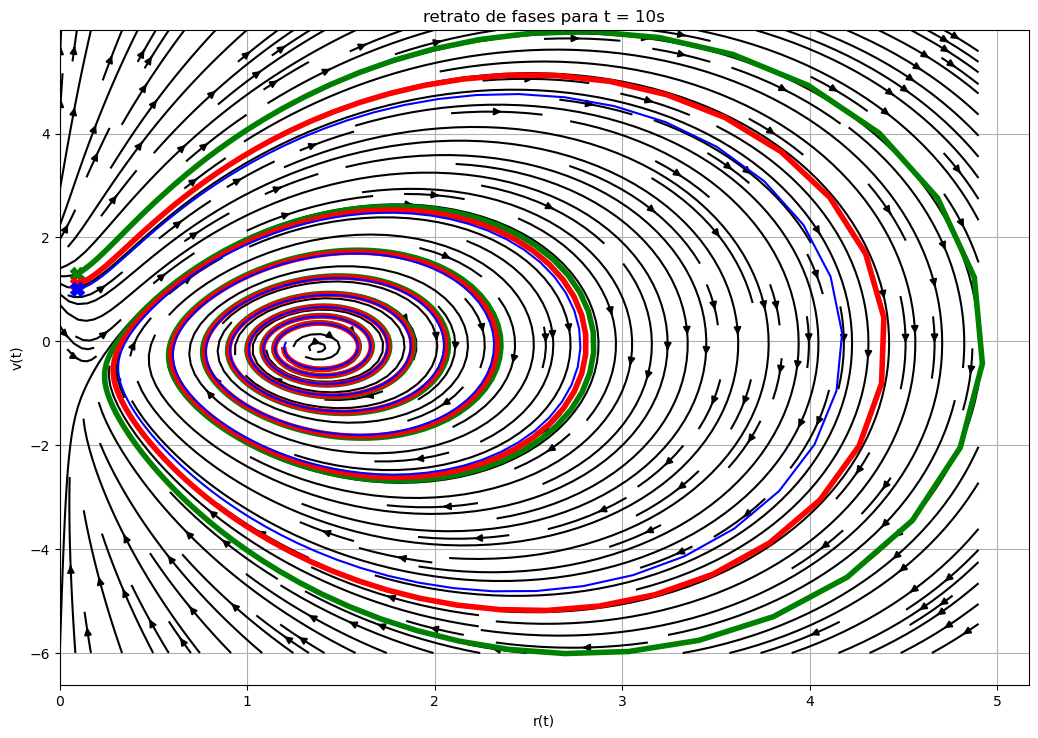

In [8]:
XX, YY = np.meshgrid(np.arange(0,5,0.1), np.arange(-6,6, .01))
DX, DY = camposin([XX, YY],10)
plt.streamplot(XX, YY, DX, DY, density=2, minlength=.05,color='black')
plt.rcParams['figure.figsize'] = [12.5, 8.5]
plt.grid()
plt.title('retrato de fases para t = 10s')
#integro para atras y adelante desde el saddle
dt = 0.01
t = np.arange(0,10, step=dt)
#se ve que en (0,-2) hay algo
xrk1 = np.zeros_like(t)
yrk1 = np.zeros_like(t)
xrk1[0] = 0.09
yrk1[0] = 1.3
for ix, tt in enumerate(t[:-1]):
    xrk1[ix+1], yrk1[ix+1] = rk4(campoconstante, [xrk1[ix], yrk1[ix]], tt, dt,10) #aca puse tiempo= 10
plt.plot(xrk1, yrk1,color='green',linewidth=4)
plt.plot(xrk1[0], yrk1[0], 'gX',markersize=10)
##############################
xrk2 = np.zeros_like(t)
yrk2 = np.zeros_like(t)
xrk2[0] = 0.09
yrk2[0] = 1.1
for ix, tt in enumerate(t[:-1]):
    xrk2[ix+1], yrk2[ix+1] = rk4(campoconstante, [xrk2[ix], yrk2[ix]], tt, dt,10) #aca puse tiempo= 10
plt.plot(xrk2, yrk2,color='red',linewidth=4)
plt.plot(xrk2[0], yrk2[0], 'rX',markersize=10)
####################################
xrk3 = np.zeros_like(t)
yrk3 = np.zeros_like(t)
xrk3[0] = 0.09
yrk3[0] = 1
for ix, tt in enumerate(t[:-1]):
    xrk3[ix+1], yrk3[ix+1] = rk4(campoconstante, [xrk3[ix], yrk3[ix]], tt, dt,10) #aca puse tiempo= 10
plt.plot(xrk3, yrk3,color='blue')
plt.plot(xrk3[0], yrk3[0], 'bX',markersize=10)

#plt.xlim(0,3)
#plt.ylim(-3,3)
plt.xlabel('r(t)')
plt.ylabel('v(t)')

When I go back, I again go through the bistable region:

Text(0, 0.5, 'v(t)')

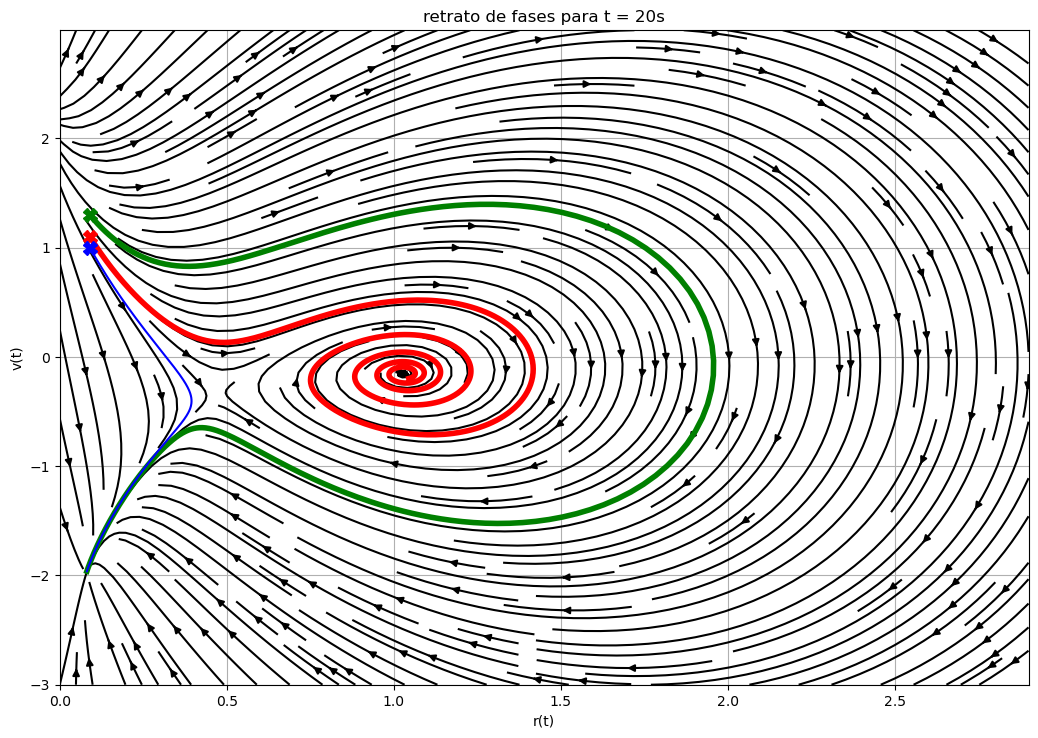

In [9]:
XX, YY = np.meshgrid(np.arange(0,3,0.1), np.arange(-3,3, .01))
DX, DY = camposin([XX, YY],20)
plt.streamplot(XX, YY, DX, DY, density=2, minlength=.05,color='black')
plt.rcParams['figure.figsize'] = [12.5, 8.5]
plt.grid()
plt.title('retrato de fases para t = 20s')
#integro para atras y adelante desde el saddle
dt = 0.01
t = np.arange(0,10, step=dt)
#se ve que en (0,-2) hay algo
xrk1 = np.zeros_like(t)
yrk1 = np.zeros_like(t)
xrk1[0] = 0.09
yrk1[0] = 1.3
for ix, tt in enumerate(t[:-1]):
    xrk1[ix+1], yrk1[ix+1] = rk4(campoconstante, [xrk1[ix], yrk1[ix]], tt, dt,20) #aca puse tiempo= 20
plt.plot(xrk1, yrk1,color='green',linewidth=4)
plt.plot(xrk1[0], yrk1[0], 'gX',markersize=10)
##############################
xrk2 = np.zeros_like(t)
yrk2 = np.zeros_like(t)
xrk2[0] = 0.09
yrk2[0] = 1.1
for ix, tt in enumerate(t[:-1]):
    xrk2[ix+1], yrk2[ix+1] = rk4(campoconstante, [xrk2[ix], yrk2[ix]], tt, dt,20) #aca puse tiempo= 20
plt.plot(xrk2, yrk2,color='red',linewidth=4)
plt.plot(xrk2[0], yrk2[0], 'rX',markersize=10)
####################################
xrk3 = np.zeros_like(t)
yrk3 = np.zeros_like(t)
xrk3[0] = 0.09
yrk3[0] = 1
for ix, tt in enumerate(t[:-1]):
    xrk3[ix+1], yrk3[ix+1] = rk4(campoconstante, [xrk3[ix], yrk3[ix]], tt, dt,20) #aca puse tiempo= 20
plt.plot(xrk3, yrk3,color='blue')
plt.plot(xrk3[0], yrk3[0], 'bX',markersize=10)

plt.xlabel('r(t)')
plt.ylabel('v(t)')


But what if I keep on changing the parameter? I will land on the other side of the bistable region, and be left with a single attractor.
This is what's called the bottleneck: the ghost of the saddle-node bifurcation. Quotins Steven Strogatz: 'Even after the fixed points have annihilated each other, they continue to influence the flow—as in Section 4.3, they leave a ghost, a bottleneck region that sucks trajectories in and delays them before allowing passage out the other side.' 'The fixed points near no longer exist, but they still make themselves felt through a saddle-node ghost'.
In the video there seems to be an agreement with the square root scaling law, by which the closer the parameter gets to the bifurcation point, the more delayed the trajectories get on the ghost, and the bottleneck is more evident.

Text(0, 0.5, 'v(t)')

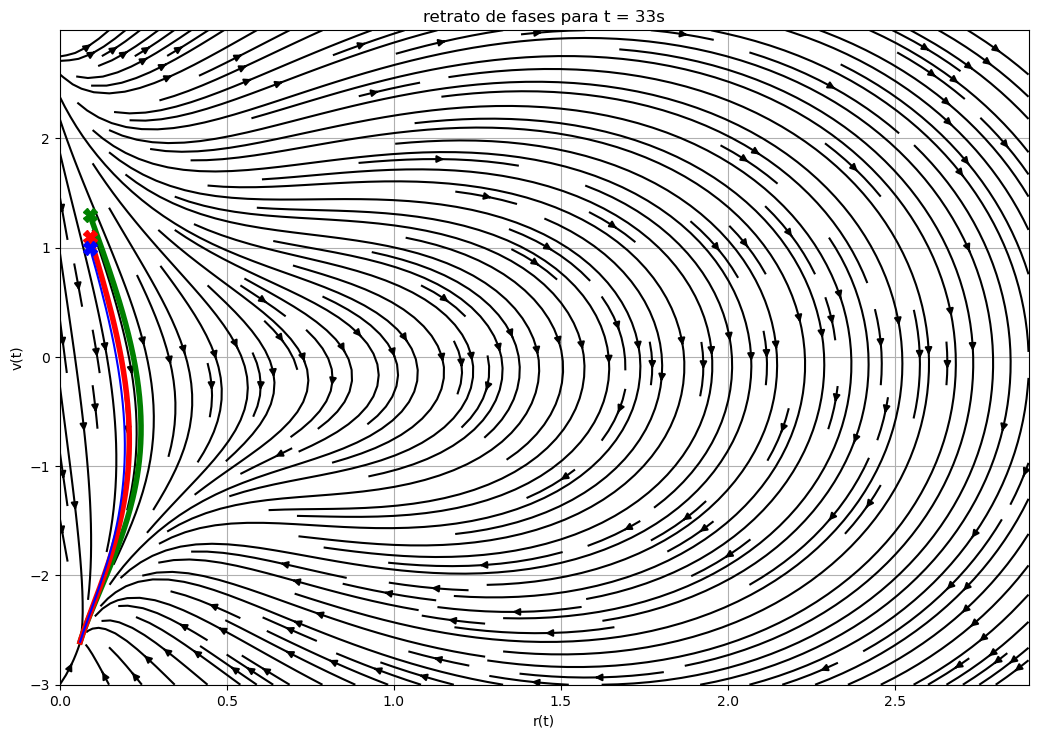

In [10]:
XX, YY = np.meshgrid(np.arange(0,3,0.1), np.arange(-3,3, .01))
DX, DY = camposin([XX, YY],33)
plt.streamplot(XX, YY, DX, DY, density=2, minlength=.05,color='black')
plt.rcParams['figure.figsize'] = [12.5, 8.5]
plt.grid()
plt.title('retrato de fases para t = 33s')
#integro para atras y adelante desde el saddle
dt = 0.01
t = np.arange(0,10, step=dt)
#se ve que en (0,-2) hay algo
xrk1 = np.zeros_like(t)
yrk1 = np.zeros_like(t)
xrk1[0] = 0.09
yrk1[0] = 1.3
for ix, tt in enumerate(t[:-1]):
    xrk1[ix+1], yrk1[ix+1] = rk4(campoconstante, [xrk1[ix], yrk1[ix]], tt, dt,33) #aca puse tiempo= 33
plt.plot(xrk1, yrk1,color='green',linewidth=4)
plt.plot(xrk1[0], yrk1[0], 'gX',markersize=10)
##############################
xrk2 = np.zeros_like(t)
yrk2 = np.zeros_like(t)
xrk2[0] = 0.09
yrk2[0] = 1.1
for ix, tt in enumerate(t[:-1]):
    xrk2[ix+1], yrk2[ix+1] = rk4(campoconstante, [xrk2[ix], yrk2[ix]], tt, dt,33) #aca puse tiempo= 33
plt.plot(xrk2, yrk2,color='red',linewidth=4)
plt.plot(xrk2[0], yrk2[0], 'rX',markersize=10)
####################################
xrk3 = np.zeros_like(t)
yrk3 = np.zeros_like(t)
xrk3[0] = 0.09
yrk3[0] = 1
for ix, tt in enumerate(t[:-1]):
    xrk3[ix+1], yrk3[ix+1] = rk4(campoconstante, [xrk3[ix], yrk3[ix]], tt, dt,33) #aca puse tiempo= 33
plt.plot(xrk3, yrk3,color='blue')
plt.plot(xrk3[0], yrk3[0], 'bX',markersize=10)
plt.xlabel('r(t)')
plt.ylabel('v(t)')
